### Nicolas Bataille
07/11/2021\
Student number : 2131029

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

2021-11-10 14:22:03.144784: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 14:22:03.144815: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Task 4.1

In [2]:
wineData = np.load('Datas/wineData.npy')
wineLabels = np.load('Datas/wineLabels.npy')

wineDataTrain, wineDataTest, wineLabelsTrain, wineLabelsTest = train_test_split(wineData, wineLabels, test_size=0.2)

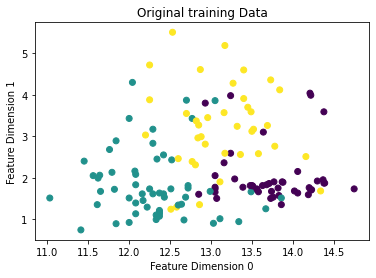

In [3]:
plt.figure()
plt.scatter(wineDataTrain[:,0], 
            wineDataTrain[:,1],
            c = wineLabelsTrain)
plt.title('Original training Data')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.show()

#### Data Standardisation

In [4]:
standardScaler = StandardScaler()

standardScaler.fit(wineDataTrain)

wineDataTrain = standardScaler.transform(wineDataTrain)
wineDataTest = standardScaler.transform(wineDataTest)

#### Creating and training a multiclass SVM

In [5]:
SVM = SVC()
SVM.fit(wineDataTrain, wineLabelsTrain)

SVC()

#### Predicting labels on the testing set


In [6]:
wineDataTestPrediction = SVM.predict(wineDataTest)

winePredictionAccuracy = SVM.score(wineDataTest, wineLabelsTest)
print(f'The model accuracy on the testing data is {winePredictionAccuracy*100:0.2f}%')

The model accuracy on the testing data is 100.00%


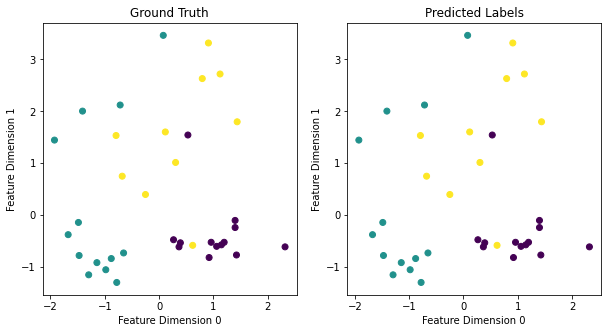

In [7]:
plt.figure(figsize=[10,5])

plt.subplot(121)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = wineLabelsTest)
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.subplot(122)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = wineDataTestPrediction)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.show()

### Task 4.2

### Creating a Tensorflow Fully Connected Neural Network with a Sequential Model

In [8]:
outputSize = len(np.unique(wineLabelsTrain))

# note: Dense layers are fully connected layers
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(6, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(outputSize, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

2021-11-10 14:22:05.354092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-10 14:22:05.354133: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-10 14:22:05.354158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Batum-Laptop): /proc/driver/nvidia/version does not exist
2021-11-10 14:22:05.354437: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training the model on the data

In [9]:
history = model.fit(wineDataTrain, 
            wineLabelsTrain, 
            epochs = 100,
            validation_split = 0.2,
            verbose = 1)

2021-11-10 14:22:05.825308: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
4/4 [==============================] - 1s 77ms/step - loss: 1.1099 - sparse_categorical_accuracy: 0.3628 - val_loss: 1.0201 - val_sparse_categorical_accuracy: 0.3103
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 1.0824 - sparse_categorical_accuracy: 0.3717 - val_loss: 0.9978 - val_sparse_categorical_accuracy: 0.3103
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0584 - sparse_categorical_accuracy: 0.3805 - val_loss: 0.9776 - val_sparse_categorical_accuracy: 0.3103
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0358 - sparse_categorical_accuracy: 0.3982 - val_loss: 0.9591 - val_sparse_categorical_accuracy: 0.3103
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0145 - sparse_categorical_accuracy: 0.4159 - val_loss: 0.9418 - val_sparse_categorical_accuracy: 0.3103
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9961 - sparse_categorical_accuracy: 

Epoch 47/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5410 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.5019 - val_sparse_categorical_accuracy: 0.9310
Epoch 48/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5264 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.4872 - val_sparse_categorical_accuracy: 0.9310
Epoch 49/100
4/4 [==============================] - 0s 11ms/step - loss: 0.5112 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.4726 - val_sparse_categorical_accuracy: 0.9310
Epoch 50/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4960 - sparse_categorical_accuracy: 0.8496 - val_loss: 0.4585 - val_sparse_categorical_accuracy: 0.9310
Epoch 51/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4810 - sparse_categorical_accuracy: 0.8673 - val_loss: 0.4445 - val_sparse_categorical_accuracy: 0.9310
Epoch 52/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4659 - sparse_categorical_accu

Epoch 93/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1164 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.1309 - val_sparse_categorical_accuracy: 0.9310
Epoch 94/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1121 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.1292 - val_sparse_categorical_accuracy: 0.9310
Epoch 95/100
4/4 [==============================] - 0s 12ms/step - loss: 0.1086 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.1274 - val_sparse_categorical_accuracy: 0.9310
Epoch 96/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1258 - val_sparse_categorical_accuracy: 0.9310
Epoch 97/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1009 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.1243 - val_sparse_categorical_accuracy: 0.9310
Epoch 98/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0972 - sparse_categorical_accu

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 84        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Get the predicted labels on the Testing dataset
SVMPredict = model.predict(wineDataTest)
# Get the loss and accuracy of the model on the Testing dataset
results = model.evaluate(wineDataTest, wineLabelsTest)
print(f'The accuracy is {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 3ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9722
The accuracy is 97.22%


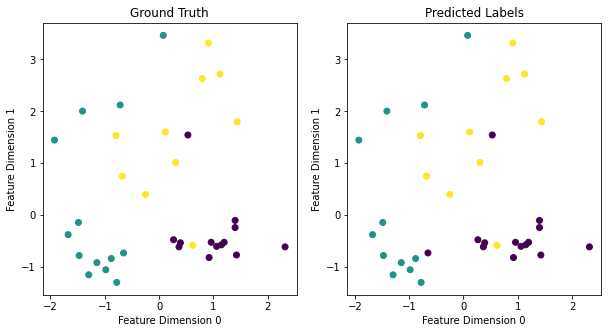

In [12]:
plt.figure(figsize=[10,5])

plt.subplot(121)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = wineLabelsTest)
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.subplot(122)
plt.scatter(wineDataTest[:,0],
            wineDataTest[:,1],
            c = np.argmax(SVMPredict, axis = 1))
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

plt.show()

#### Plotting the accuracy and the loss of our fitted model

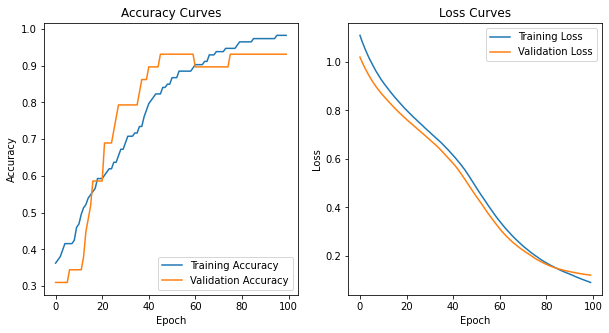

In [13]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

##### After tweaking the model's hyperparameters, I think that changing the first hidden layer's number of neurons from 4 to 6 and using the Adam optimizer gives much better results in terms of accuracy and loss than using the SGD optimizer

### Task 4.3

In [14]:
(mnistDataTrain, mnistLabelsTrain), (mnistDataTest, mnistLabelsTest) = tf.keras.datasets.mnist.load_data()

In [15]:
print(f"MNIST sample shape : {mnistDataTrain.shape[1:]}")
print(f"Number of training samples : {mnistDataTrain.shape[0]}")
print(f"Number of testing samples : {mnistDataTest.shape[0]}")
print(f"Number of classes : {len(np.unique(mnistLabelsTrain))}")

MNIST sample shape : (28, 28)
Number of training samples : 60000
Number of testing samples : 10000
Number of classes : 10


In [16]:
# Flattening our datasets
mnistDataTrain = np.reshape(mnistDataTrain, (60000, 784))
mnistDataTest = np.reshape(mnistDataTest, (10000, 784))

In [17]:
# Normalizing the data
mnistDataTrain = mnistDataTrain / 255
mnistDataTest = mnistDataTest / 255

In [18]:
# Best Model definition according to 
# https://direct.mit.edu/neco/article-abstract/22/12/3207/7596/Deep-Big-Simple-Neural-Nets-for-Handwritten-Digit
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(25, activation = tf.nn.relu),
    tf.keras.layers.Dense(20, activation = tf.nn.relu),
    tf.keras.layers.Dense(15, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(5, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [19]:
history = model.fit(mnistDataTrain, 
            mnistLabelsTrain, 
            epochs = 10,
            validation_split = 0.2,
            verbose = 1)

2021-11-10 14:22:12.775840: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7949 - sparse_categorical_accuracy: 0.7486 - val_loss: 0.3352 - val_sparse_categorical_accuracy: 0.9131
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3209 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.2719 - val_sparse_categorical_accuracy: 0.9305
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2483 - sparse_categorical_accuracy: 0.9344 - val_loss: 0.2136 - val_sparse_categorical_accuracy: 0.9461
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2083 - sparse_categorical_accuracy: 0.9439 - val_loss: 0.2075 - val_sparse_categorical_accuracy: 0.9454
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1846 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.2029 - val_sparse_categorical_accuracy: 0.9497
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1670 - spars

In [20]:
# Get the predicted labels on the Testing dataset
SVMPredict = model.predict(mnistDataTest)
# Get the loss and accuracy of the model on the Testing dataset
results = model.evaluate(mnistDataTest, mnistLabelsTest)
print(f'The accuracy is {results[1]*100:0.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.1993 - sparse_categorical_accuracy: 0.9503
The accuracy is 95.03%


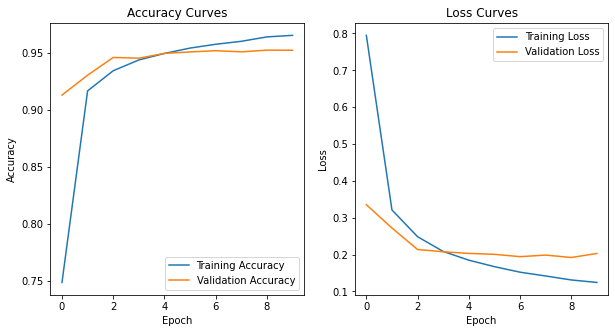

In [21]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Task 4.4

In [50]:
(mnistDataTrain, mnistLabelsTrain), (mnistDataTest, mnistLabelsTest) = tf.keras.datasets.mnist.load_data()

In [51]:
mnistDataTrain = np.expand_dims(mnistDataTrain, axis= (3))
mnistDataTest = np.expand_dims(mnistDataTest, axis= (3))
# print(mnistDataTrain.shape)
# print(mnistDataTest.shape)

In [52]:
mnistDataTrain = mnistDataTrain / 255
mnistDataTest = mnistDataTest / 255

In [45]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=tf.keras.metrics.CategoricalAccuracy())

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 5, input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
flatten_13 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                64010     
Total params: 83,338
Trainable params: 83,338
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model.fit(mnistDataTrain, 
            mnistLabelsTrain, 
            epochs = 10,
            validation_split = 0.2,
            verbose = 1)

Epoch 1/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0138 - sparse_categorical_accuracy: 0.9953 - val_loss: 0.0460 - val_sparse_categorical_accuracy: 0.9873
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0110 - sparse_categorical_accuracy: 0.9963 - val_loss: 0.0469 - val_sparse_categorical_accuracy: 0.9887
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0093 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.0478 - val_sparse_categorical_accuracy: 0.9888
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0068 - sparse_categorical_accuracy: 0.9979 - val_loss: 0.0513 - val_sparse_categorical_accuracy: 0.9885
Epoch 5/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0064 - sparse_categorical_accuracy: 0.9980 - val_loss: 0.0539 - val_sparse_categorical_accuracy: 0.9902
Epoch 6/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.

In [69]:
# Get the predicted labels on the Testing dataset
CNNPredict = model.predict(mnistDataTest)
# Get the loss and accuracy of the model on the Testing dataset
results = model.evaluate(mnistDataTest, mnistLabelsTest)
print(f'The accuracy is {results[1]*100:0.2f}%')

313/313 [==============================] - 2s 6ms/step - loss: 0.0560 - sparse_categorical_accuracy: 0.9901
The accuracy is 99.01%


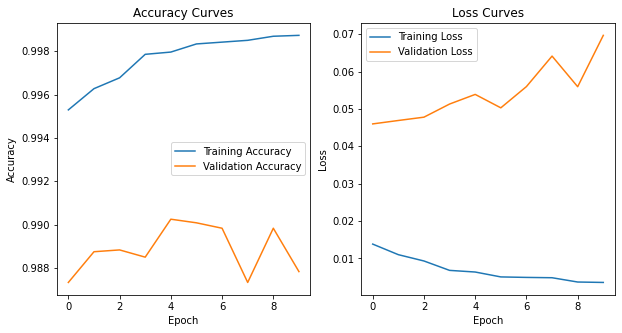

In [70]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()